# Topic :: Neural Networks

# Question 2:
    PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading Dataset

df=pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA & Visualization

In [3]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='size_category', ylabel='count'>

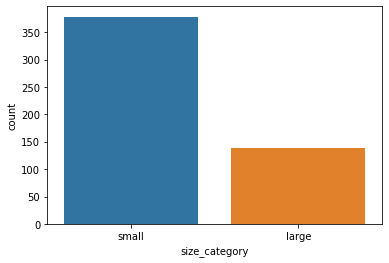

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['size_category'])

<AxesSubplot:xlabel='month', ylabel='count'>

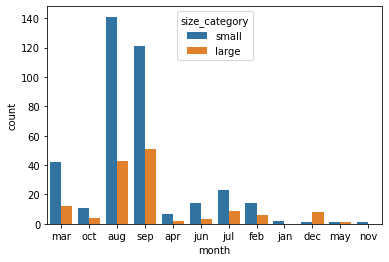

In [6]:
sns.countplot(x = df['month'],hue=df['size_category'])

<AxesSubplot:xlabel='day', ylabel='count'>

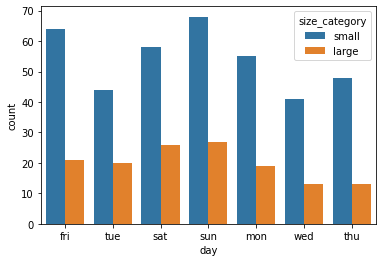

In [7]:
sns.countplot(x = df['day'],hue=df['size_category'])

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

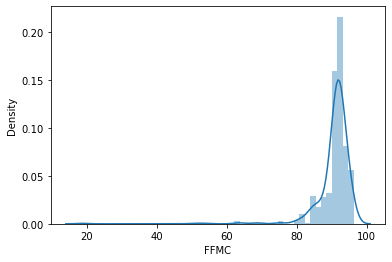

In [8]:
sns.distplot(df['FFMC'])

<AxesSubplot:xlabel='DMC', ylabel='Density'>

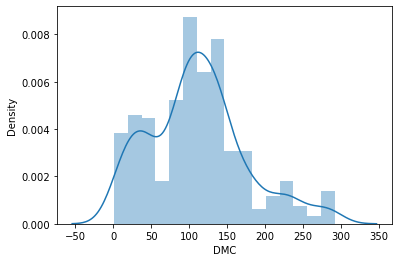

In [9]:
sns.distplot(df['DMC'])

<AxesSubplot:xlabel='DC', ylabel='Density'>

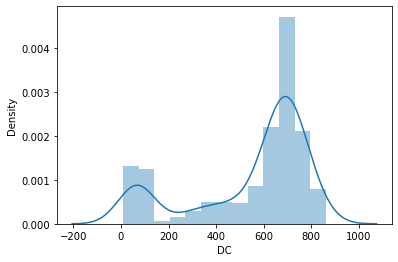

In [10]:
sns.distplot(df['DC'])

<AxesSubplot:xlabel='ISI', ylabel='Density'>

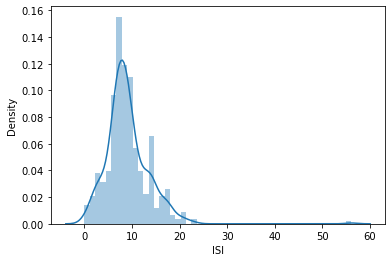

In [11]:
sns.distplot(df['ISI'])

<AxesSubplot:xlabel='temp', ylabel='Density'>

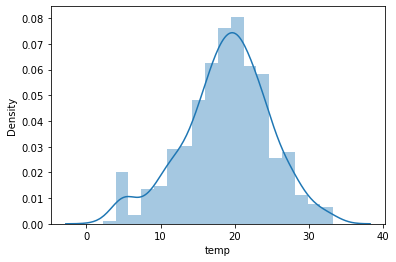

In [12]:
sns.distplot(df['temp'])

<AxesSubplot:xlabel='RH', ylabel='Density'>

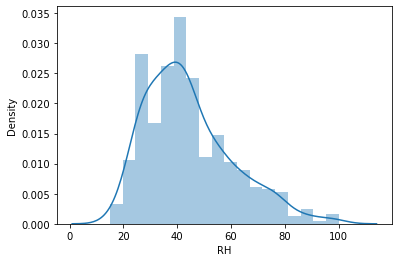

In [13]:
sns.distplot(df['RH'])

<AxesSubplot:xlabel='wind', ylabel='Density'>

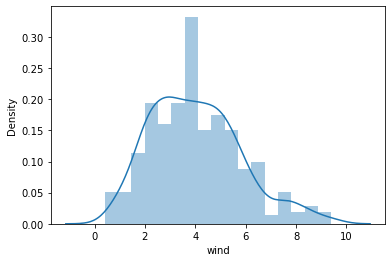

In [14]:
sns.distplot(df['wind'])

<AxesSubplot:xlabel='rain', ylabel='Density'>

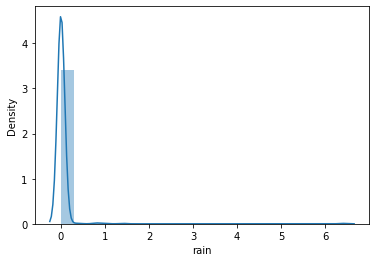

In [15]:
sns.distplot(df['rain'])

In [16]:
drop_df = df.drop(labels=['month','day'],axis = 1)
drop_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
drop_df['size_category'] = le.fit_transform(drop_df['size_category'])
drop_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

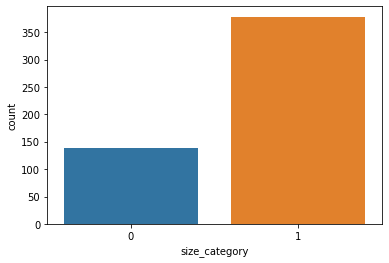

In [18]:
sns.countplot(drop_df['size_category'])

In [19]:
drop_df['size_category'].replace({'small':0,'large':1},inplace = True)
drop_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
corr=drop_df.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


<AxesSubplot:>

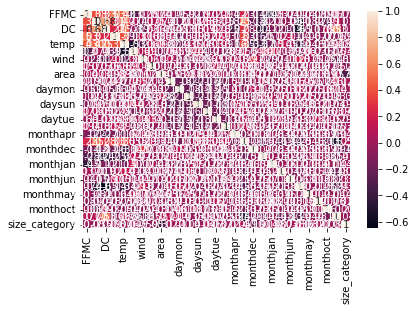

In [21]:
sns.heatmap(corr,annot=True)

# Model Building

In [22]:
X = drop_df.drop(labels='size_category',axis = 1)
Y= drop_df[['size_category']]

In [23]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [26]:
x_train, x_test, y_train, y_test  = train_test_split(X,Y,test_size=0.30,random_state=41)

In [27]:
x_train.shape,y_train.shape

((361, 28), (361, 1))

In [28]:
y_train.shape,y_train.shape

((361, 1), (361, 1))

In [29]:
#Data Is Imbalance so we have to balance it , so here we are using smote operation of balancing technique
!pip install imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC       ISI       temp  RH      wind  \
 0    90.600000   35.400000  669.100000  6.700000  21.700000  24  4.500000   
 1    93.700000  231.100000  715.100000  8.400000  18.900000  64  4.900000   
 2    92.200000  102.300000  751.500000  8.400000  24.200000  27  3.100000   
 3    91.600000  248.400000  753.800000  6.300000  16.800000  56  3.100000   
 4    91.100000  103.200000  638.800000  5.800000  23.100000  31  3.100000   
 ..         ...         ...         ...       ...        ...  ..       ...   
 529  88.563248   51.690045  102.893414  7.606436  11.283308  42  5.800000   
 530  90.927239  127.317169  688.161576  7.000000  19.066035  46  3.316797   
 531  83.914989   53.356128  671.078806  3.134661  25.382123  30  2.802888   
 532  90.710011   43.789770   92.099671  5.740263  11.680197  58  3.689660   
 533  92.797410  161.794626  576.684809  9.403286  25.853537  38  3.246115   
 
      rain       area  dayfri  ...  monthdec  monthfeb  monthj

In [31]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

# Covert data into standard scale

In [32]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train

array([[0.92774194, 0.11819435, 0.77504992, ..., 0.        , 1.        ,
        0.        ],
       [0.96774194, 0.79255686, 0.82908493, ..., 0.        , 0.        ,
        0.        ],
       [0.9483871 , 0.34872502, 0.87184306, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.84148372, 0.18006936, 0.77737438, ..., 0.        , 0.        ,
        0.        ],
       [0.92916143, 0.14710465, 0.09726262, ..., 0.        , 0.        ,
        0.        ],
       [0.95609561, 0.55373751, 0.6664922 , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
X_test = scale.fit_transform(x_test)
X_test

array([[0.89715536, 0.48571429, 0.70037763, ..., 0.        , 0.        ,
        0.        ],
       [0.89277899, 0.62752613, 0.50719849, ..., 0.        , 0.        ,
        0.        ],
       [0.88840263, 0.44076655, 0.80800094, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.91247265, 0.6097561 , 0.70497994, ..., 0.        , 0.        ,
        0.        ],
       [0.87089716, 0.33658537, 0.73554402, ..., 0.        , 0.        ,
        0.        ],
       [0.74835886, 0.0815331 , 0.40606561, ..., 0.        , 0.        ,
        0.        ]])

# Training of model:Activation Function & Kernel Initializer

In [35]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [36]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [43]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsc_res = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsc_res = gsc.fit(X_train,y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.757 total time=   3.6s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.850 total time=   3.7s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.832 total time=   3.5s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.850 total time=   3.5s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.934 total time=   3.9s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.776 total time=   3.8s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.794 total time=   3.4s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.822 total time=   3.6s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.841 total time=   3.5s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.000 total time=   3.4s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.776 total time=   3.6s
[CV 2/5] END Activat

In [44]:
print(gsc_res.best_params_,gsc_res.best_score_)

{'Activation_Function': 'relu', 'init': 'normal'} 0.8522482752799988


# Tuning of Hyperparameter:Number of Neurons in hidden layer

In [38]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [42]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsc = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsc_result = gsc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.776 total time=   4.5s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.243 total time=   3.9s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.813 total time=   3.5s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.252 total time=   3.6s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.000 total time=   3.9s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.757 total time=   3.5s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.832 total time=   3.4s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.832 total time=   3.5s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.860 total time=   4.0s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.934 total time=   4.1s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.757 total time=   4.0s
[CV 2/5] END Activat

# Train a model with optimum values of hyperparameter

In [45]:
# best Parameters
# batch_size = 10
# epochs = 50
# dropout_rate = 0.1
# learning rate = 0.001
# activation_function = tanh
# kernel_initiative = normal
# neuron1 = 8
# neuron2 = 8

In [46]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [47]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 20)
model.fit(X_train,y_train)

Epoch 1/20
54/54 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 2/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5581
Epoch 3/20
54/54 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5356
Epoch 4/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.7322
Epoch 5/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.8071
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.8165
Epoch 7/20
54/54 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8165
Epoch 8/20
54/54 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8408
Epoch 9/20
54/54 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8202
Epoch 10/20
54/54 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8240
Epoch 11/20
54/54 [

In [48]:
y_predict = model.predict(X_train)
accuracy_score(y_train,y_predict)

17/17 [==============================] - 0s 1ms/step


0.850187265917603

In [49]:
confusion_matrix(y_train,y_predict)

array([[189,  78],
       [  2, 265]], dtype=int64)

In [50]:
classification_report(y_train,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.99      0.71      0.83       267\n           1       0.77      0.99      0.87       267\n\n    accuracy                           0.85       534\n   macro avg       0.88      0.85      0.85       534\nweighted avg       0.88      0.85      0.85       534\n'

In [51]:
# testing data
y_test_pred = model.predict(X_test)
accuracy_score(y_test,y_test_pred)

5/5 [==============================] - 0s 2ms/step


0.8525641025641025

In [52]:
# Here the value of optimum hyperparameter gives a 85%